## 1. 소상공인 시장진흥공단 상가업소정보로 스타벅스 이디야 위치 분석

- 이디야는 스타벅스 근처에 입점한다는 설이 있었다. 과연 스벅과 이디야의 매장입지는 얼마나 차이가 날까?
- 관련기사를 읽고 이디야와 스벅 매장을 기사와 유사하게 분석하고 시각화 해보면서 가설을 확인해 보자
- http://news.bizwatch.co.kr/article/consumer/2018/01/19/0015

### 1.1 다루는 내용
- 공공데이터를 활용해 텍스트 데이터를 정제하고 원하는 정보 찾아내기
- 문자열에서 원하는 텍스트 추출하기
- 문자열을 활용한 다양한 분석방법과 위치정보 사용하기
- folium을 통한 위경도 데이터 시각화

## 2. 필요한 라이브러리 불러오기

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

### 2.1 시각화를 위한 한글 폰트 설정 

In [2]:
#시각화를 위한 한글 폰트 설정 

plt.rc ('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

#글씨색 진하게 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

C:\Users\김선림\AppData\Local\Temp\ipykernel_15952\980726876.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


## 3.데이터 불러오기

In [3]:
%ls data_apt


df = pd.read_csv('data_apt/상가상권정보/상가업소정보_201912_01.csv', sep='|')
df.shape

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 866A-7EEA

 C:\Users\김선림\data_apt 디렉터리

2022-09-07  오전 12:42    <DIR>          .
2022-09-07  오전 12:42    <DIR>          ..
2022-09-07  오전 12:42    <DIR>          상가상권정보
2022-09-07  오전 12:42    <DIR>          전국도시공원표준데이터
2022-09-07  오전 12:42    <DIR>          전국신규민간아파트분양가격동향
               0개 파일                   0 바이트
               5개 디렉터리  440,339,070,976 바이트 남음


(573680, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 3.1 결측치보기

<AxesSubplot:>

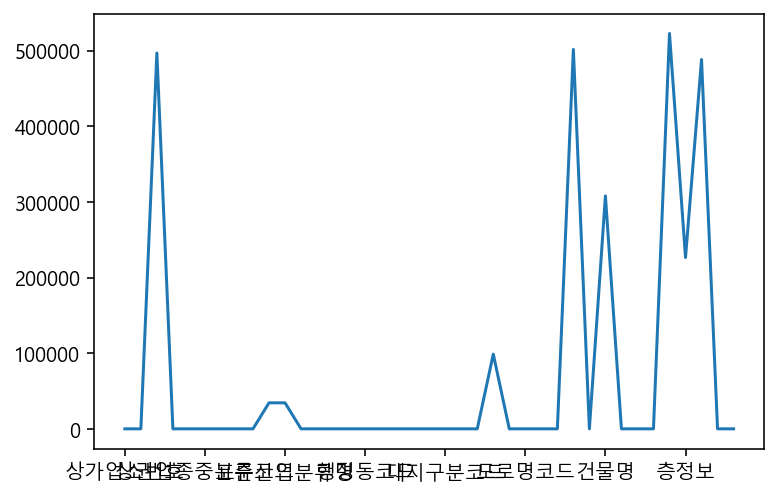

In [5]:
df.isnull().sum().plot()

### 3.2 사용하지 않는 컬럼제거

In [6]:
#사용할 컬럼만 모으기

columns=['상호명','상권업종대분류명','상권업종중분류명', '상권업종소분류명',
         '시도명','시군구명','행정동명','법정동명','도로명주소','경도','위도'
    ]
df=df[columns].copy()
df.shape

(573680, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 4. 색인으로 서브셋 가져오기

### 4.1 서울만가져오기 

In [8]:
df_seoul=df[df['시도명']=='서울특별시'].copy()
df_seoul.shape

(407376, 11)

### 4.2 일부 텍스트가 들어가는 데이터만 가져오기 > 스벅, 이디야

In [9]:
#상호명 소문자로 바꾸기
df_seoul['상호명_소문자']=df_seoul['상호명'].str.lower()

In [10]:
#이디야 찾기 
#상호명만 보기

df_seoul.loc[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya'),'상호명_소문자']
#543개

1675       이디야커피
2957       이디야커피
8534       이디야커피
13913        이디아
14605      이디야커피
           ...  
557161     이디야커피
557163     이디야커피
557498     이디야커피
565196    이디아스포츠
568636     이디야커피
Name: 상호명_소문자, Length: 543, dtype: object

In [11]:
#스타벅스
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks'),'상호명_소문자']
#506개


1104                스타벅스
2023           스타벅스종로3가점
2770                스타벅스
14770     스타벅스커피여의도ifc1f
14781               스타벅스
               ...      
563387              스타벅스
567090              스타벅스
567828              스타벅스
570096              스타벅스
571052              스타벅스
Name: 상호명_소문자, Length: 506, dtype: object

In [12]:
#새로운 변수에 담기 
df_cafe=df_seoul[df_seoul['상호명_소문자'].str.contains('이디야|이디아|ediya|스타벅스|starbucks')].copy()
df_cafe.shape
#1049개 

(1049, 12)

In [13]:
df_cafe.loc[df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명']='스타벅스'
df_cafe.loc[-df_cafe['상호명_소문자'].str.contains('스타벅스|starbucks'),'브랜드명']='이디야'##스타벅스가 아닌건 다 이디야

df_cafe[['상호명_소문자','브랜드명']].head()

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


In [14]:
df_cafe[['상호명','브랜드명']].head()

,상호명,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스
2770,스타벅스,스타벅스
2957,이디야커피,이디야


### 4.3. 시각화 

In [15]:
df_cafe['상권업종중분류명'].value_counts()

#카페 이외의 업종은 스벅과 이디야 아닐것임 > 제외하기 

커피점/카페       1036
학원-어학           3
광고/인쇄           2
주유소/충전소         1
유흥주점            1
분양              1
주택수리            1
기타판매업           1
종합소매점           1
패스트푸드           1
운동/경기용품소매       1
Name: 상권업종중분류명, dtype: int64

In [16]:
#커피점 카페인것만 가져오기
df_cafe=df_cafe[df_cafe['상권업종중분류명']=='커피점/카페'].copy()
df_cafe.shape

(1036, 13)

In [17]:
#브랜드명으로 각 카페 갯수보기

df_cafe['브랜드명'].value_counts()

#이디야가 조금 더 많아 보임

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

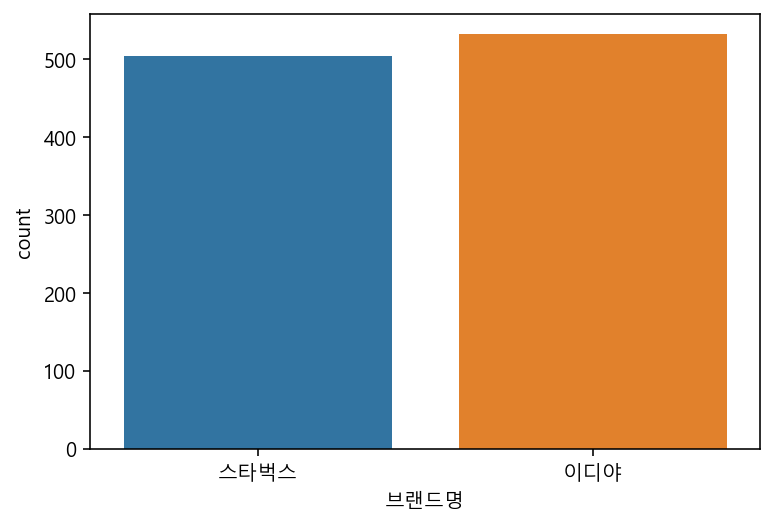

In [18]:
sns.countplot(data=df_cafe,x='브랜드명')

<AxesSubplot:xlabel='시군구명', ylabel='count'>

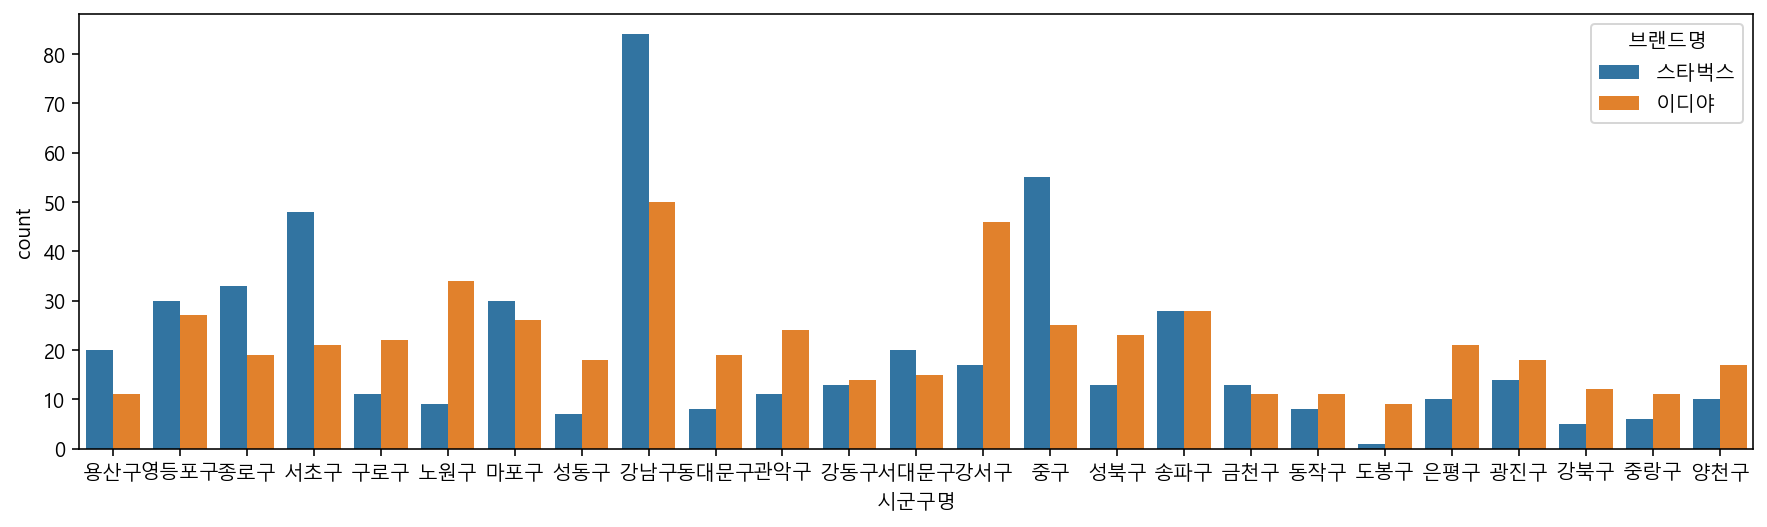

In [19]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe,x='시군구명',hue='브랜드명')

### 4.4 scatterplot그리기 

<AxesSubplot:xlabel='경도', ylabel='위도'>

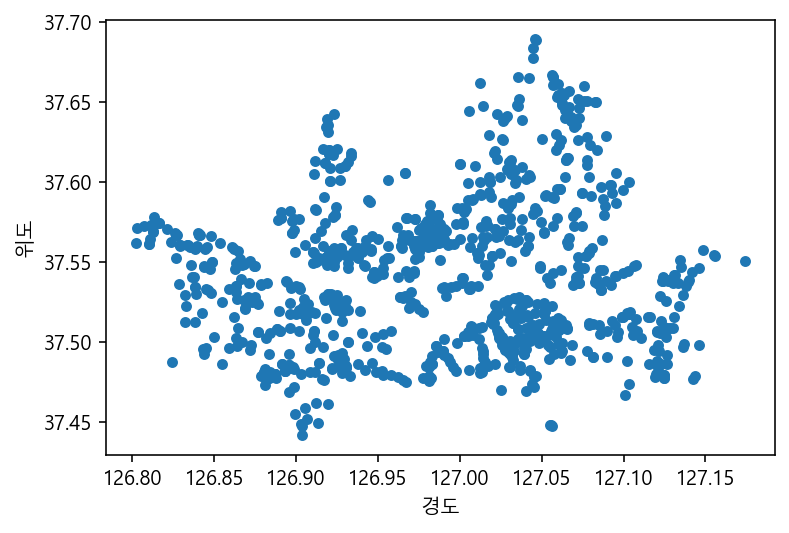

In [20]:
#pandas로 scatterplot그리기

df_cafe[['위도','경도']].plot.scatter(x='경도',y='위도')

<AxesSubplot:xlabel='경도', ylabel='위도'>

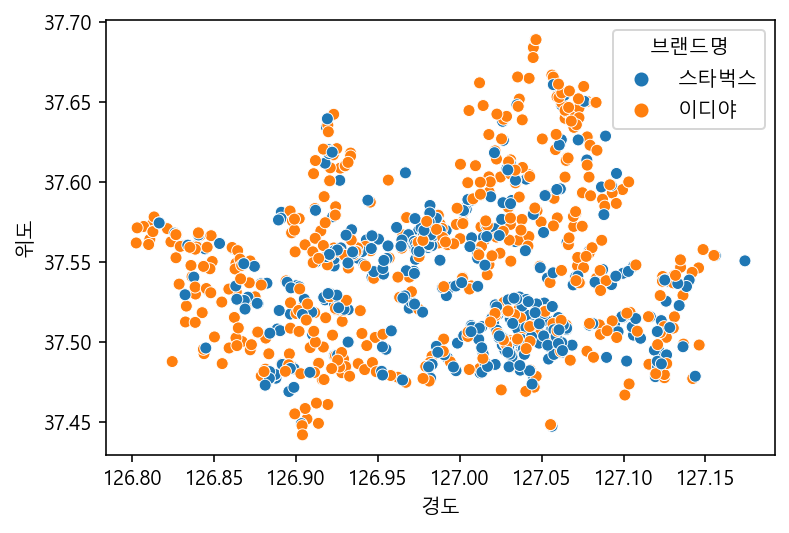

In [21]:
sns.scatterplot(data=df_cafe,x='경도',y='위도',hue='브랜드명')

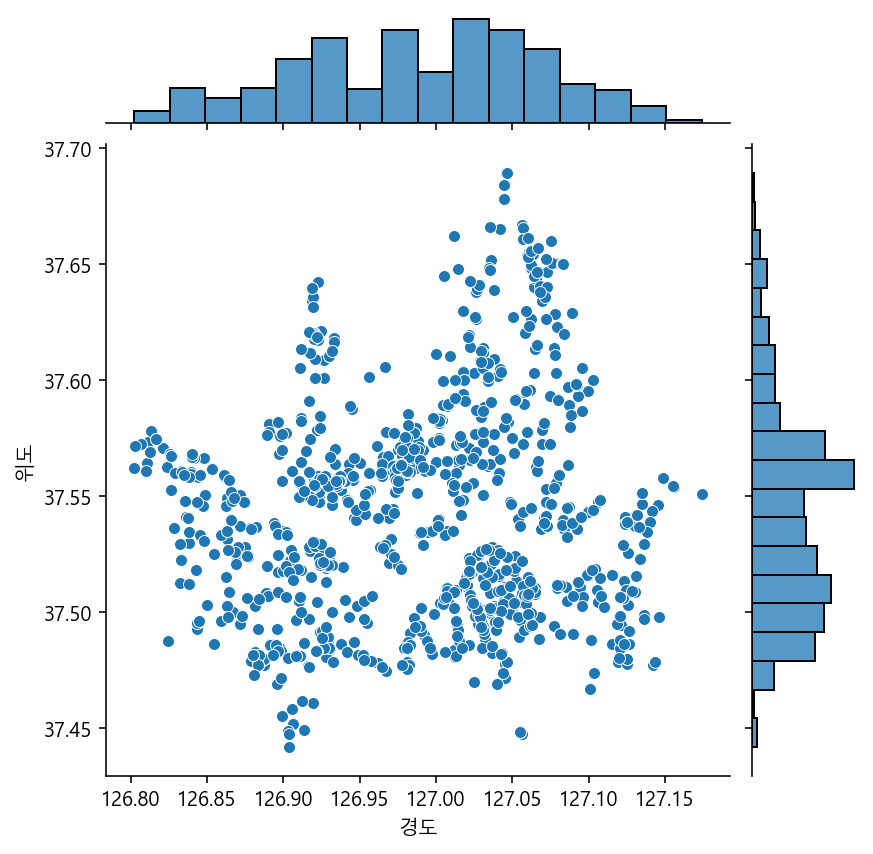

In [22]:
sns.jointplot(data=df_cafe,x='경도',y='위도')

#jointplot은 히스토그램+스케터플롯

## 5. 구별 브랜드별 점포수

### 5.1 groupby 사용

In [23]:
#시군구명에 따라 브랜드명의 상호명 카운트

df_cafe_vs=df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()
df_cafe_vs.head()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
Name: 상호명, dtype: int64

In [76]:
#인덱스를 컬럼으로 만들기>reset_index사용

df_cafe_vs=df_cafe_vs.reset_index()
df_cafe_vs.head()

,index,구,브랜드명,매장수
0,0,강남구,스타벅스,84
1,1,강남구,이디야,50
2,2,강동구,스타벅스,13
3,3,강동구,이디야,14
4,4,강북구,스타벅스,5


In [25]:
df_cafe_vs.columns=['구','브랜드명','매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


### 5.2 pivot_table

In [26]:
#피봇은 연산 못함

pivot=pd.pivot_table(data=df_cafe, index=['시군구명','브랜드명'],values='상호명',aggfunc='count')
pivot.head()

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5

In [27]:
pivot.loc['강남구']

,상호명
브랜드명,
스타벅스,84
이디야,50


### 5.3 시각화

<AxesSubplot:xlabel='구', ylabel='매장수'>

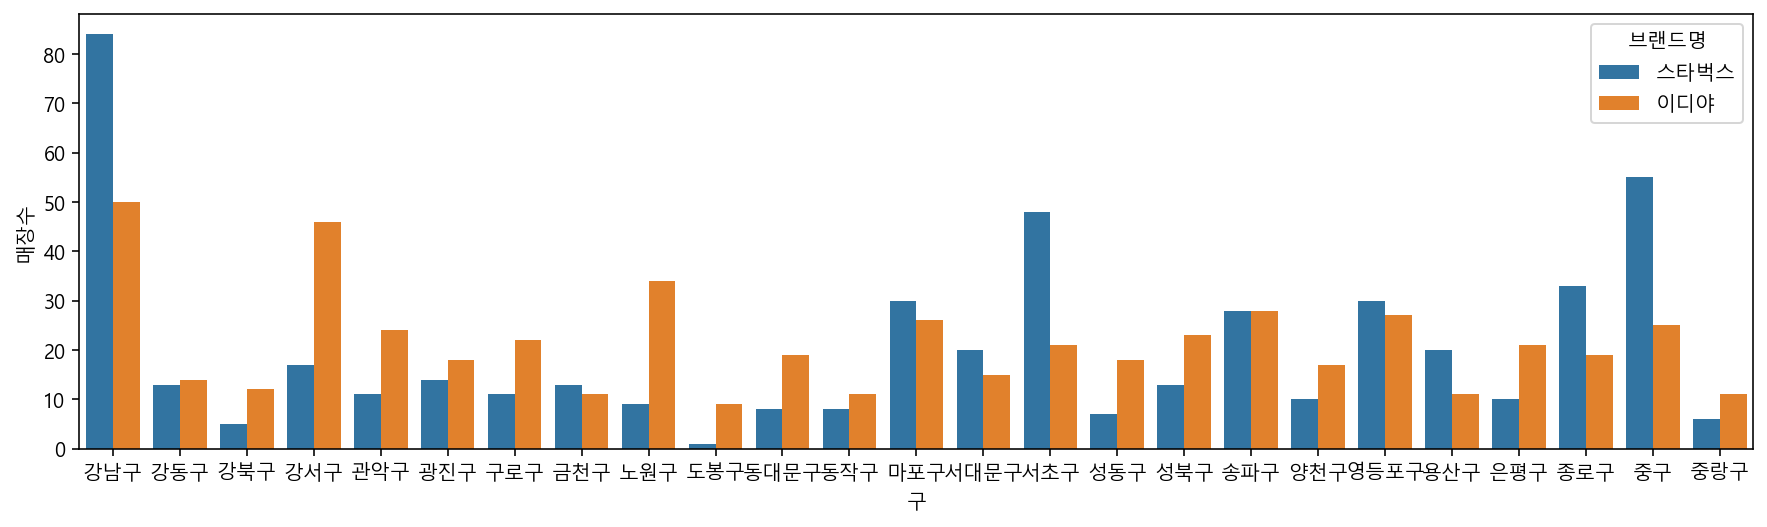

In [28]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_cafe_vs, x='구',y='매장수',hue='브랜드명')

In [29]:
#groupby를 통해 시군구명, 브랜드명 그룹화하고 상호명 갯수 다시 세어보자 

group=df_cafe.groupby(['시군구명','브랜드명'])['상호명'].count()



In [30]:
#group 화 한것은 언스택 해주기 
group.unstack()  #데이터 프레임으로 보여줌 


브랜드명,스타벅스,이디야
시군구명,,
강남구,84,50
강동구,13,14
강북구,5,12
강서구,17,46
관악구,11,24
광진구,14,18
구로구,11,22
금천구,13,11
노원구,9,34


<AxesSubplot:xlabel='시군구명'>

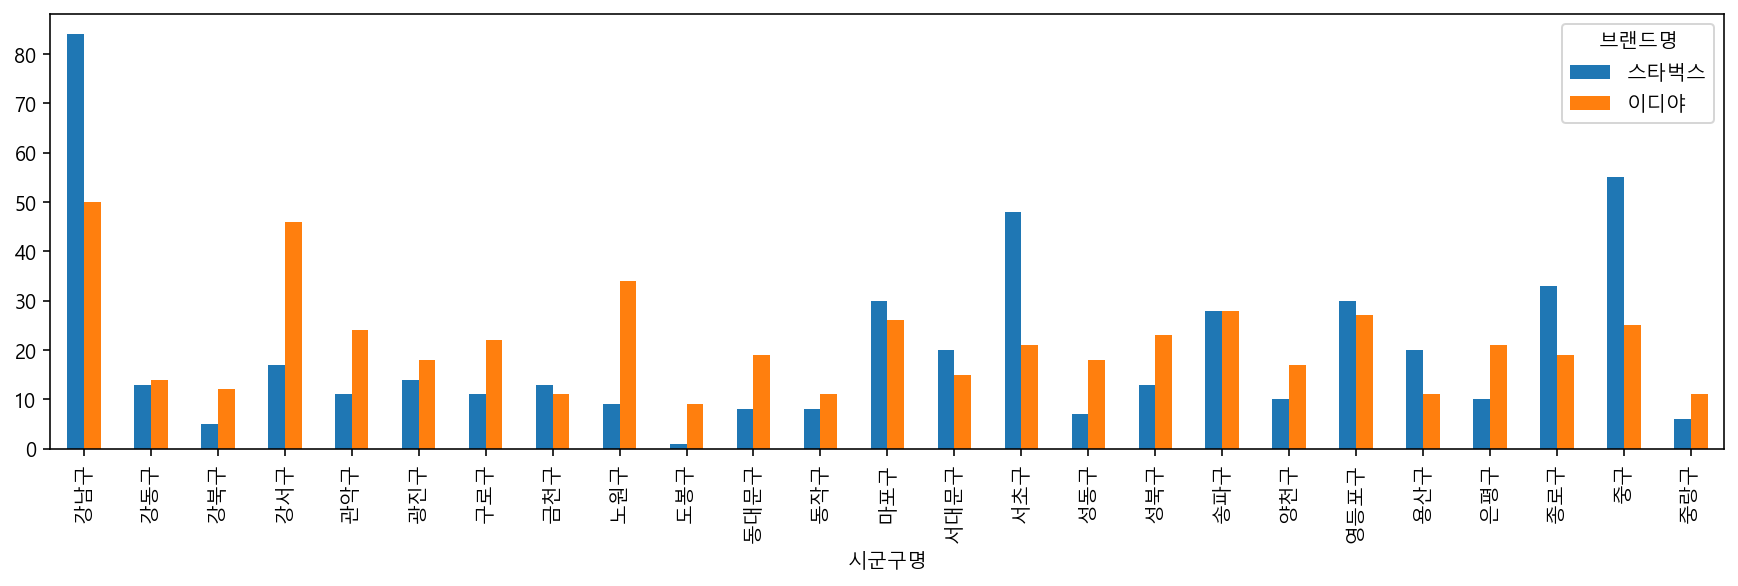

In [31]:
group.unstack().plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명', ylabel='count'>

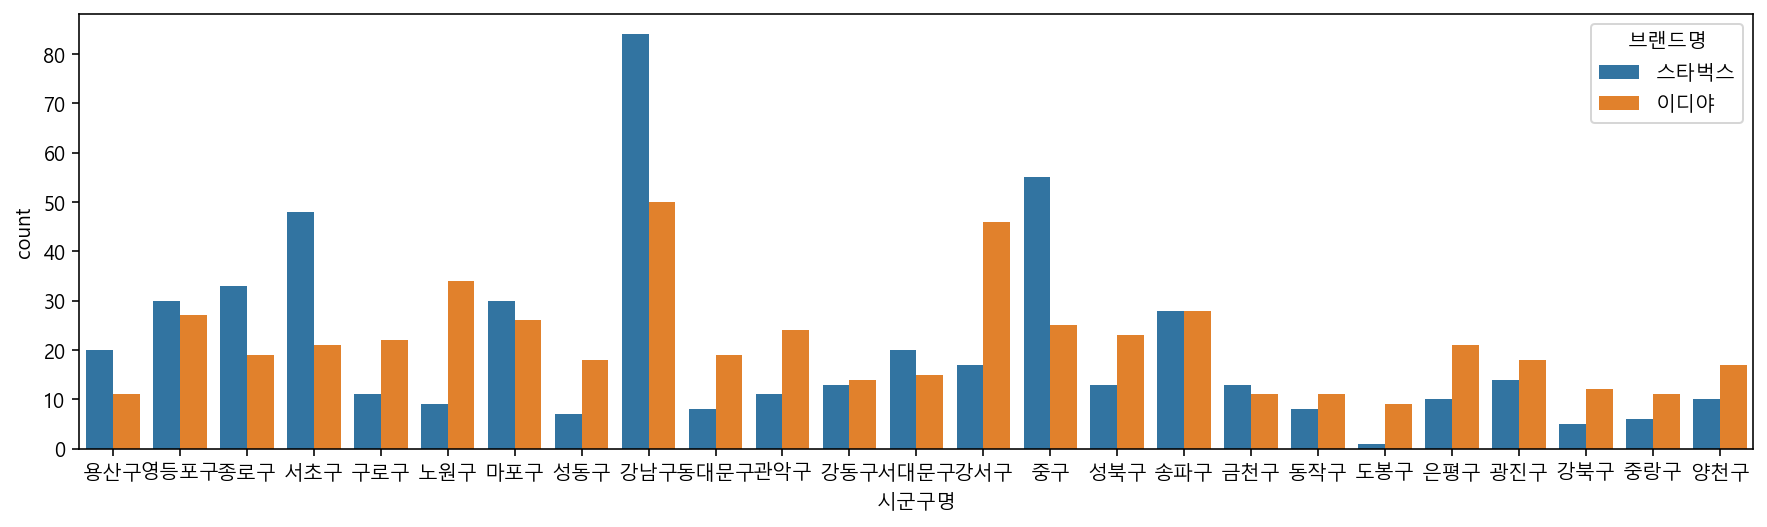

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe,x='시군구명',hue='브랜드명')

## 6. Folium 으로 지도 활용하기 

In [33]:
import folium

In [34]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균구하기 

lat =df_cafe['위도'].mean()
long =df_cafe['경도'].mean()

lat,long

(37.5429213982126, 126.9887885123524)

In [35]:
#스벅과 이디야 위도 경도의 평균값으로 산출한 지도의 중심값
m=folium.Map ([lat,long])
m

In [36]:
m=folium.Map ([lat,long],zoom_start=12,tiles="Stamen Toner")

for i in df_cafe.index:
    sub_lat=df_cafe.loc[i,'위도']
    sub_long=df_cafe.loc[i,'경도']
    
    title = df_cafe.loc[i,'상호명']+"_"+df_cafe.loc[i,'도로명주소']
    color='green'
    
    if df_cafe.loc[i,'브랜드명']=='이디야':
        color='blue'
    
    
    folium.CircleMarker(
               
        [sub_lat, sub_long],
        radius=3,
        color=color,
        #popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)
    
m

### 6.1 choropleth을 위한 Geo JSON

In [47]:
#서울 행정구역 경계를 GeoJSON으로 표현

geo_path='data_apt/상가상권정보/seoul_municipalities_geo_simple.json'


import json
geo_json =json.load(open(geo_path,encoding='utf-8'))
geo_json['features'][0]['properties']['name']

'강동구'

### 6.2 스타벅스 매장 분포

In [ ]:
#df_cafe_vs의 스벅 가져오기 

df_star=df_cafe_vs[df_cafe_vs['브랜드명']=='스타벅스'].copy()
df_star.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [ ]:
#geo_json에서 구이름 가져오기
#키값으로 가져오기

geo_json['features'][0]['properties']['name']

'강동구'

In [53]:
#df_cafe_starbusks로 스벅 매장수 구하기 


m=folium.Map([lat,long])
m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='스타벅스 매장수'
).add_to(m)



m

### 6.3 이디야 매장 분포

In [57]:
df_ediya=df_cafe_vs[df_cafe_vs['브랜드명']=='이디야'].copy()
df_ediya.head()

,구,브랜드명,매장수
1,강남구,이디야,50
3,강동구,이디야,14
5,강북구,이디야,12
7,강서구,이디야,46
9,관악구,이디야,24


In [61]:

m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)



  


m

#이디야 강서에 많다

In [62]:
m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['구', '매장수'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)


for i in df_cafe.index:
    sub_lat=df_cafe.loc[i,'위도']
    sub_long=df_cafe.loc[i,'경도']
    
    title = df_cafe.loc[i,'상호명']+"_"+df_cafe.loc[i,'도로명주소']
    color='green'
    
    if df_cafe.loc[i,'브랜드명']=='이디야':
        color='blue'
    
    
    folium.CircleMarker(
               
        [sub_lat, sub_long],
        radius=3,
        color=color,
        #popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)


m

### 6.4 매장수 크기를 반영해 CircleMarker그리기

In [ ]:
df_vs=df_cafe_vs.pivot(index='구',columns='브랜드명',values='매장수')
df_vs['매장수비교']=df_vs['스타벅스']-df_vs['이디야'] >0
df_vs.head()
#스벅과 이디야가 다른 행에 들어가 있음
# 한곳에 넣어주기 위해Reshape 해줄 것임
#스벅과 이디야 매장 차이를 구하기 

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False


In [78]:
#매장수 비교 타입 float로 바꾸기 > 코로플레이스를 하기위해 

df_vs['매장수비교']=df_vs['매장수비교'].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
구,,,
강남구,84,50,1.0
강동구,13,14,0.0
강북구,5,12,0.0
강서구,17,46,0.0
관악구,11,24,0.0


In [80]:
#구가 인덱스였는데 컬럼으로 리셋 하기 
df_vs = df_vs.reset_index()
df_vs.head()


브랜드명,index,구,스타벅스,이디야,매장수비교
0,0,강남구,84,50,1.0
1,1,강동구,13,14,0.0
2,2,강북구,5,12,0.0
3,3,강서구,17,46,0.0
4,4,관악구,11,24,0.0


### 6.5 Choropleth로 매장수 많고 적음 표시 

In [81]:
m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)

m



In [83]:
##구별로 서클 마커 그리기 
## 그러기 위해서는 각 구의 위경도 값을 알아야함
## 구별 위경도 평균값 구하기 

#피봇으로 구별 경도 위도 편균값 구할 수 있음
df_gu_mean=df_cafe.pivot_table(index='시군구명',values=['경도','위도'],aggfunc='mean')
df_gu_mean=df_gu_mean.reset_index()    
df_gu_mean.head()

,시군구명,경도,위도
0,강남구,127.046129,37.505744
1,강동구,127.135417,37.540316
2,강북구,127.022897,37.631146
3,강서구,126.837883,37.555966
4,관악구,126.935210,37.482054


In [87]:
df_vs=df_vs.merge(df_gu_mean, how='inner',left_on='구',right_on='시군구명')
df_vs.head()

,index,구,스타벅스,이디야,매장수비교,시군구명,경도,위도
0,0,강남구,84,50,1.0,강남구,127.046129,37.505744
1,1,강동구,13,14,0.0,강동구,127.135417,37.540316
2,2,강북구,5,12,0.0,강북구,127.022897,37.631146
3,3,강서구,17,46,0.0,강서구,126.837883,37.555966
4,4,관악구,11,24,0.0,관악구,126.935210,37.482054


In [88]:
for i in df_vs.index:
    sub_long=df_vs.loc[i,'경도']
    sub_lat=df_vs.loc[i,'위도']
    
    

In [107]:
m = folium.Map([lat, long],zoom_start=11)

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['구', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)

for i in df_vs.index:
    sub_long=df_vs.loc[i,'경도']
    sub_lat=df_vs.loc[i,'위도']
    
    cafes=['스타벅스','이디야']
    for cafe in cafes: 
        cafe_count=df_vs.loc[i,cafe]
        
        
        gu=df_vs.loc[i,'구']
        tooltip=f"{gu} {cafe}:{cafe_count}"
        
        radius=np.sqrt(cafe_count)*3
        color='green'
        if cafe =='이디야':
            color='blue'
            sub_long=sub_long+0.01
            
        folium.CircleMarker([sub_lat,sub_long],
                            radius=radius,
                            color=color,
                            fill=True,
                            tooltip=tooltip
                            ).add_to(m)

m